<a href="https://colab.research.google.com/github/RemasAlmalki/Data-Analysis-Project/blob/main/Data_Analysis_Project_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Remas almalki _Reem Ghazi

### group:2

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score ,classification_report
import pandas as pd

In [2]:
pip install scikit-learn


In [3]:
df = pd.read_csv('/content/breast_cancer_wisconsin_diagnostic.csv')
df.head(25)

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


In [4]:
df.shape

(569, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# تحويل عمود Diagnosis إلى قيم رقمية (1 للخبيث "M"، 0 للحميد "B")
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# إسقاط عمود 'ID' وتجهيز البيانات
X = df.drop(columns=['ID', 'Diagnosis'])
y = df['Diagnosis']

# تقسيم البيانات إلى تدريب واختبار (20% من البيانات للاختبار)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# إنشاء نموذج Gaussian Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# التنبؤ
y_pred = nb_classifier.predict(X_test)

# تقييم أداء المصنف
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# طباعة النتائج
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_rep)

# عرض أول 25 صفًا من البيانات للتحقق
print(df.head(25))

Accuracy: 97.37%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

          ID  Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0     842302          1       17.990         10.38          122.80     1001.0   
1     842517          1       20.570         17.77          132.90     1326.0   
2   84300903          1       19.690         21.25          130.00     1203.0   
3   84348301          1       11.420         20.38           77.58      386.1   
4   84358402          1       20.290         14.34          135.10     1297.0   
5     843786          1       12.450         15.70           82.57      477.1   
6     844359          1       18.250         19.98          119.60

In [16]:
# Calculate the minimum and maximum values of 'radius_mean' in the dataset
min_radius = df['radius_mean'].min()
max_radius = df['radius_mean'].max()

print(f"Minimum radius_mean: {min_radius}")
print(f"Maximum radius_mean: {max_radius}")

Minimum radius_mean: 6.981
Maximum radius_mean: 28.11


In [18]:
# Use 'radius_mean' as the feature (X) and 'Diagnosis' as the target (y)
X = df['radius_mean'].values.reshape(-1, 1)
y = df['Diagnosis'].values

# Import the logistic regression model
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model and fit it to the data
logr = LogisticRegression() # Removed linear_model. from this line
logr.fit(X, y)

# Predict if a tumor is cancerous (1) or benign (0) for a given size, e.g., 15.0 mm (1), 14.0 mm(0)
predicted = logr.predict(np.array([14.0]).reshape(-1, 1))
print(predicted)


[0]


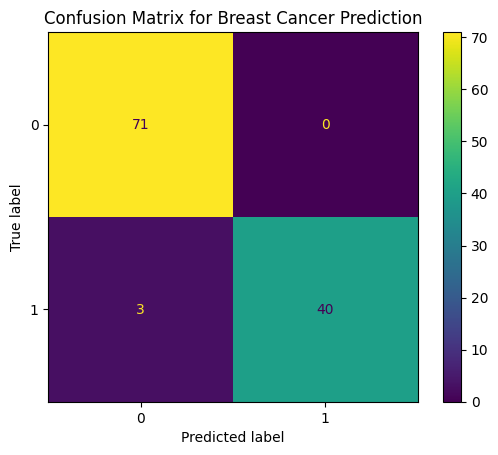

In [19]:
# Import the necessary function from sklearn.metrics
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
labels = [0, 1,]  # Labels for benign (0) and malignant (1)
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

# Show the plot
plt.title("Confusion Matrix for Breast Cancer Prediction")
plt.show()

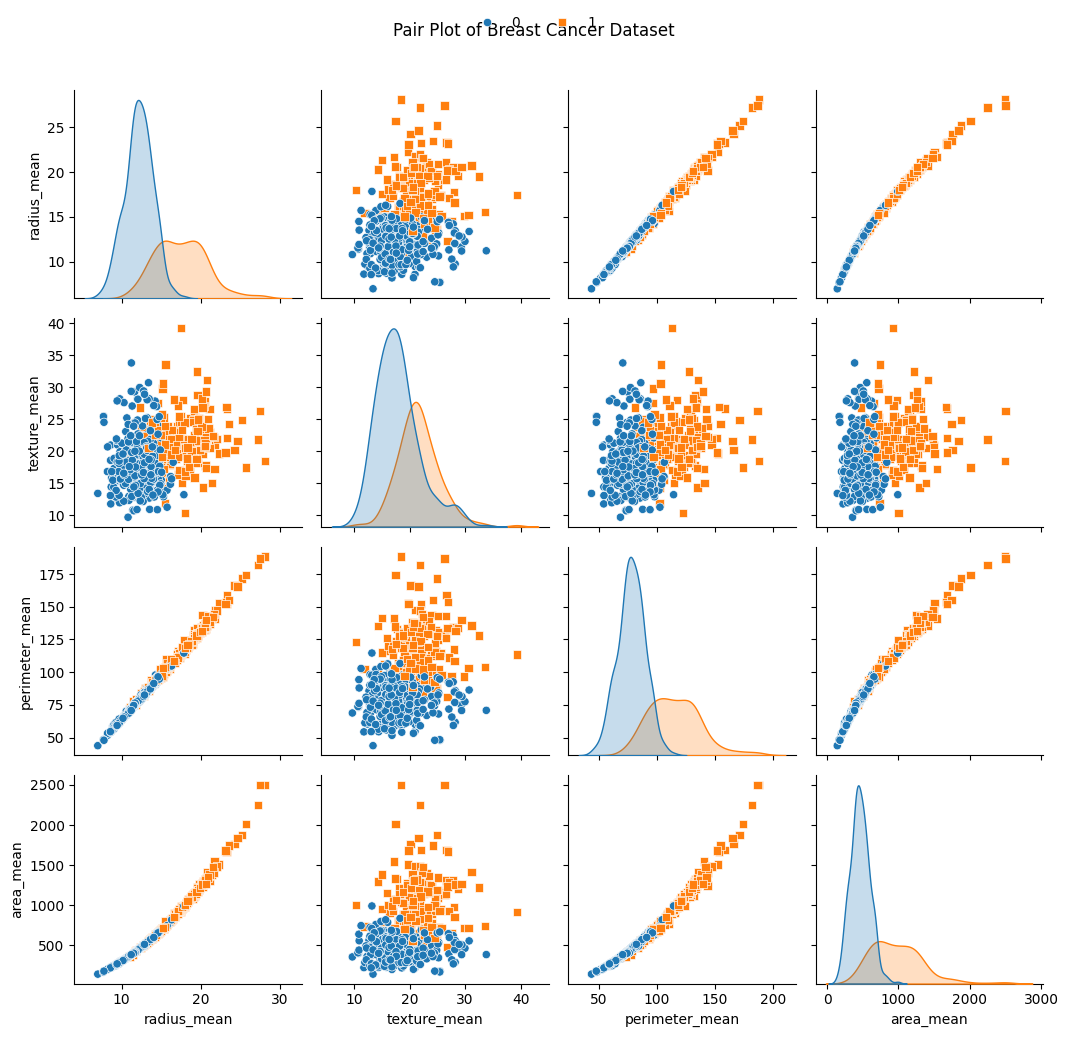

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# To understand the relationship between variables
# Create a smaller subset of the dataset with selected features to visualize
# (Choose 4-5 features to make the pair plot more readable)
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'Diagnosis']  # Changed 'Diagnosis_Encoded' to 'Diagnosis'
subset_df = df[selected_features]

# Create a pair plot to visualize relationships between different features and diagnosis
# Changed 'Diagnosis_Encoded' to 'Diagnosis' in the hue parameter
ax = sns.pairplot(subset_df, hue='Diagnosis', markers=["o", "s"])
plt.suptitle("Pair Plot of Breast Cancer Dataset", y=1.02)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)

# Show the plot
plt.tight_layout()
plt.show()